In [2]:
from rubiks import *
from solver import *
import timeit


F B L L B'


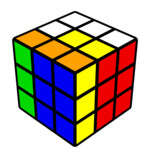

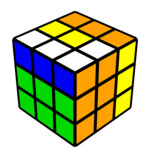

In [9]:
# generate a scramble
steps = 5
moves = generateScramble(steps) # 4 move scramble
c = cube()
c.move(moves)
print(moves)
c.view()
c.view_back()

D' F' B R' U


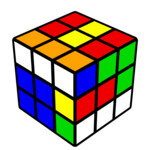

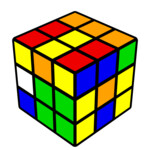

In [33]:
# generate a scramble
steps = 10
moves = ["D'", "F'", 'B', "R'", 'U']
moves = ' '.join(moves)
c = cube()
c.move(moves)
print(moves)
c.view()
c.view_back()

In [4]:
'''
# of colours on a single face
With different tier for scoring:
- Same color for every tile in a row: 10 pints
- 2 colors for tiles in a row: 5 points
- 3 colors for tiles in a row: - 5 points (penalty)

With added incentive and alignment for rows
(found out to be not of good use)
'''

def numberOfColour(queueItem):
    cube = queueItem[0]
    score = 0
    for face in cube.faces:
        count = set()
        for tile in face:
            count.add(face[tile])
        if len(count)==1:
            score+=50
        if len(count)==2:
            score+=40
        if len(count)==3:
            score+=30
        if len(count)==4:
            score+=20
        if len(count)==5:
            score+=10
        if len(count)==6:
            score-=10
    return score

The starting score of the cube is : 220
The next score of the cube is : 220
The next score of the cube is : 260
The next score of the cube is : 240
Oh no no more item in the queue


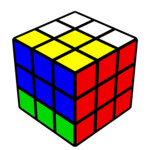

Max score in iteration: 260
["F'"]
No solution found
Time:  0.7050727999999964


In [12]:
# test if heuristic can solve the cube
s = solver(c, h=numberOfColour)
start = timeit.default_timer()
s.solve(maxDepth=10)
stop = timeit.default_timer()
print('Time: ', stop - start)

In [97]:
steps = 5
eps = 5
maxDepth = 5

R' L' D' R' R'


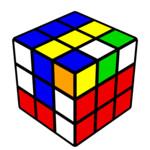

The starting score of the cube is : 130
The next score of the cube is : 130
The next score of the cube is : 160
The next score of the cube is : 160
The next score of the cube is : 180
The next score of the cube is : 160
The next score of the cube is : 170
The next score of the cube is : 140
The next score of the cube is : 140
The next score of the cube is : 160
The next score of the cube is : 180
The next score of the cube is : 180
The next score of the cube is : 190
The next score of the cube is : 170
The next score of the cube is : 170
The next score of the cube is : 180
The next score of the cube is : 180
The next score of the cube is : 160
The next score of the cube is : 160
The next score of the cube is : 170
The next score of the cube is : 170
The next score of the cube is : 150
The next score of the cube is : 160
The next score of the cube is : 150
The next score of the cube is : 150
The next score of the cube is : 150
The next score of the cube is : 150
The next score of the cu

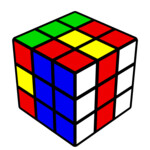

The starting score of the cube is : 200
The next score of the cube is : 200
The next score of the cube is : 260
The next score of the cube is : 260
The next score of the cube is : 300
Found Solution!
["L'", 'F', "B'"]
Time:  0.0013896000000386266

U D U' F U


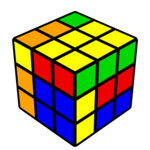

The starting score of the cube is : 140
The next score of the cube is : 140
The next score of the cube is : 200
The next score of the cube is : 260
The next score of the cube is : 300
Found Solution!
["U'", "F'", "D'"]
Time:  0.0017534999999497813

U D D' R R'


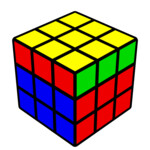

The starting score of the cube is : 260
The next score of the cube is : 260
The next score of the cube is : 300
Found Solution!
["U'"]
Time:  0.0007013999997980136

D' D' F B F'


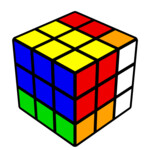

The starting score of the cube is : 200
The next score of the cube is : 200
The next score of the cube is : 260
The next score of the cube is : 260
The next score of the cube is : 300
Found Solution!
["B'", 'D', 'D']
Time:  0.001332600000068851

Average time taken: 0.004707280000002356


In [98]:
# run through more iterations of the first heuristic
time = 0
for i in range(eps):
    
    moves = generateScramble(steps) # 4 move scramble
    c = cube()
    c.move(moves)
    print(moves)
    c.view()
    
    s = solver(c, h=numberOfColour)
    start = timeit.default_timer()
    s.solve(maxDepth=maxDepth)
    stop = timeit.default_timer()
    timeTaken = stop - start
    time += timeTaken
    print('Time: ', timeTaken)
    print('=================================\n')
    
print('Average time taken: {}'.format(time/eps))